In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import scienceplots

plt.rcParams['text.usetex'] = True
plt.style.use(['science','notebook','grid'])
plt.rcParams["figure.figsize"]=(14,8)

In [82]:
# First we define the wave functions of the orbitals
def sr1s(z,r):
    return 2* z**(3/2) * np.exp(-z*r)

def sr2s(z,r):
    return 2/np.sqrt(3) * z**(5/2) * r * np.exp(-z*r)

def sr3s(z,r):
    return 2**(3/2)/(3* np.sqrt(5)) * z**(7/2) * r**2 * np.exp(-z*r)
    
def sr2p(z,r):
    return 2/np.sqrt(3) * z**(5/2) * r * np.exp(-z*r)

In [84]:
# Momentum space
def sk1s(z,k):
    return 1/((2*np.pi)**(3/2)) * 16* np.pi * z**(5/2)/(z**2+k**2)**2

def sk2s(z,k):
    return 1/((2*np.pi)**(3/2)) * 16* np.pi * z**(5/2) * (3* z**2-k**2)/(np.sqrt(3)*(z**2+k**2)**3)

def sk3s(z,k):
    return 1/((2*np.pi)**(3/2)) * 64* np.sqrt(10) * np.pi * z**(9/2) * (z**2-k**2)/(5*(z**2+k**2)**4)

def sk2p(z,k):
    return 1/((2*np.pi)**(3/2)) * 64* np.pi * k * z**(7/2) /(np.sqrt(3)*(z**2+k**2)**3)

In [86]:
# Initialize arrays to store results of every atom, to plot them
Sr_all=np.zeros(9)
Sk_all=np.zeros(9)
S_tot_all=np.zeros(9)
Smax_all=np.zeros(9)

### Helioum (He), Z=2, 1s(2)


         HELIUM (Z=2) CALCULATION RESULTS         

[Basic Checks]
- Position norm: 1.0 (expected: 1.0)
- Momentum norm: 1.0 (expected: 1.0)

[Information Measures]
- Position entropy Sr: 2.69851
- Momentum entropy Sk: 3.91342
- Total entropy S: 6.61193
- Max entropy Smax: 7.04930
- Entropy deficiency Ω: 0.06204
- Onicescu info energy: 100.36133




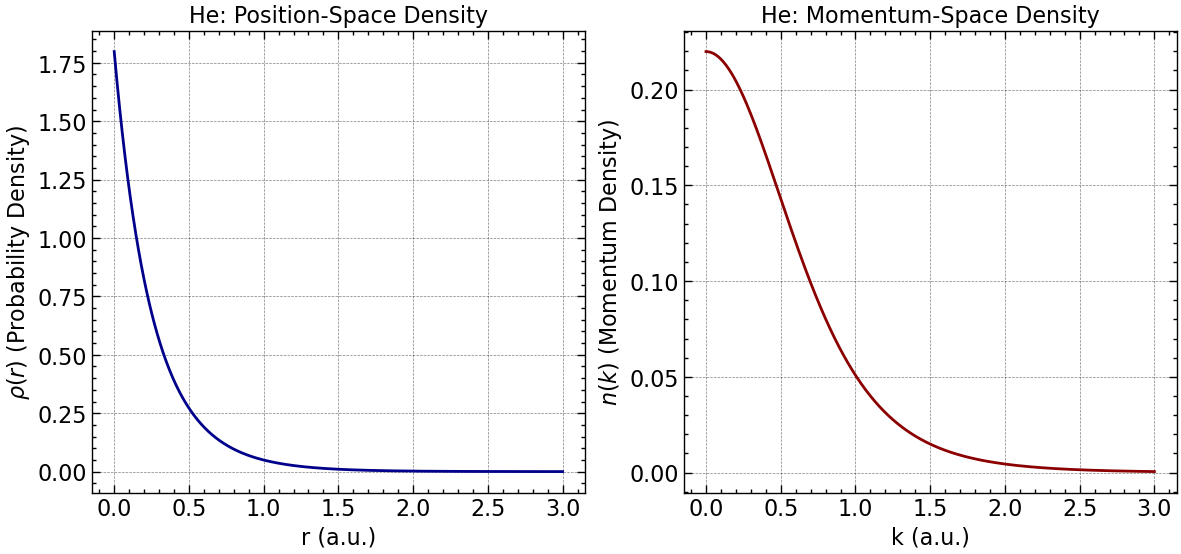

In [89]:
# Wavefunction definitions

# Radial position-space wavefunction
def R1s(r):
    return 1.347900 * sr1s(1.4595,r) -0.001613 * sr3s(5.3244,r) -0.100506 * sr2s(2.6298,r) -0.270779 * sr2s(1.7504,r)

# Radial momentum-space wavefunction
def K1s(k):
    return 1.347900 * sk1s(1.4595,k) -0.001613 * sk3s(5.3244,k) -0.100506 * sk2s(2.6298,k) -0.270779 * sk2s(1.7504,k)

# Density functions

# Electron density in position space (2 electrons)
def pr(r): 
    return 1/(4*np.pi*2) * (2*R1s(r)**2)

# Electron density in momentum space
def nk(k): 
    return 1/(4*np.pi*2) * (2*K1s(k)**2)

# Normalization checks
def NIntegrate_1(r):
    return 4 * np.pi * pr(r) * r**2

Norm_r,error_r = quad(NIntegrate_1, 0, np.inf)

def NIntegrate_2(k):
    return 4 * np.pi * nk(k) * k**2

Norm_k,error_k = quad(NIntegrate_2, 0, np.inf)

# Shannon entropies calculation

# Position-space entropy
def NIntegrate_Sr(r):
    p = pr(r)
    # Handle cases where p(r) might be 0 (log(0) is undefined
    if p == 0:
        return 0
    return -4 * np.pi * p * np.log(p) * r**2

Sr, error_Sr = quad(NIntegrate_Sr, 0, np.inf)

# Momentum-space entropy
def NIntegrate_Sk(k):
    # Handle cases where nk(k) might be 0 (log(0) is undefined)
    if nk(k)== 0:
        return 0
    return -4 * np.pi * nk(k) * np.log(nk(k)) * k**2

Sk, error_Sk = quad(NIntegrate_Sk, 0, np.inf)

# Total Shannon entropy
S_tot = Sr + Sk

# Expectation values
def NIntegrate_r2(r):
    if pr(r)==0:
        return 0
    return 4* np.pi*pr(r) * r**4

r2, error_r2 = quad(NIntegrate_r2,0,np.inf)

def NIntegrate_k2(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k) * k**4

k2, error_k2 = quad(NIntegrate_k2,0,np.inf)

# Maximum entropy  and entropy deficiency measures
Smax=3*(1+np.log(np.pi)) + 3/2 * np.log(4/9 * r2 * k2)

w=1-(Sr+Sk)/Smax

# Onisescu information energy
def NIntegrate_Er(r):
    if pr(r)==0:
        return 0
    return 4*np.pi* pr(r)**2 * r**2

Er, error_Er = quad(NIntegrate_Er,0,np.inf)

def NIntegrate_Ek(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k)**2 * k**2

Ek, error_Ek = quad(NIntegrate_Ek,0,np.inf)

Onisescu=1/(Er*Ek)

# Results ouput
print("\n" + "="*50)
print(f"{'HELIUM (Z=2) CALCULATION RESULTS':^50}")
print("="*50)

print("\n[Basic Checks]")
print(f"- Position norm: {Norm_r:.1f} (expected: 1.0)")
print(f"- Momentum norm: {Norm_k:.1f} (expected: 1.0)")

print("\n[Information Measures]")
print(f"- Position entropy Sr: {Sr:.5f}")
print(f"- Momentum entropy Sk: {Sk:.5f}")
print(f"- Total entropy S: {S_tot:.5f}")
print(f"- Max entropy Smax: {Smax:.5f}")
print(f"- Entropy deficiency Ω: {w:.5f}")
print(f"- Onicescu info energy: {Onisescu:.5f}")
print("\n")

# Density plots
r_vals=np.linspace(0, 3, 500)  
k_vals=np.linspace(0, 3, 500) 

pr_r = [pr(r) for r in r_vals]  
nk_k = [nk(k) for k in k_vals]  

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(r_vals, pr_r, color='darkblue')
plt.xlabel('r (a.u.)')
plt.ylabel(r'$\rho(r)$ (Probability Density)')
plt.title('He: Position-Space Density')

plt.subplot(1, 2, 2)
plt.plot(k_vals, nk_k, color='darkred')
plt.xlabel('k (a.u.)')
plt.ylabel(r'$n(k)$ (Momentum Density)')
plt.title('He: Momentum-Space Density')
plt.savefig('02_He.png', dpi=300,bbox_inches='tight')
plt.show()

# Storing results
Sr_all[0]=Sr
Sk_all[0]=Sk
S_tot_all[0]=S_tot
Smax_all[0]=Smax

### Lithium (Li), Z=3, 1s(2)2s(1)


        LITHUIUM (Z=3) CALCULATION RESULTS        

[Basic Checks]
- Position norm: 1.0 (expected: 1.0)
- Momentum norm: 1.0 (expected: 1.0)

[Information Measures]
- Position entropy Sr: 3.70144
- Momentum entropy Sk: 3.99682
- Total entropy S: 7.69826
- Max entropy Smax: 10.35784
- Entropy deficiency Ω: 0.25677
- Onisescu info energy: 9.15713




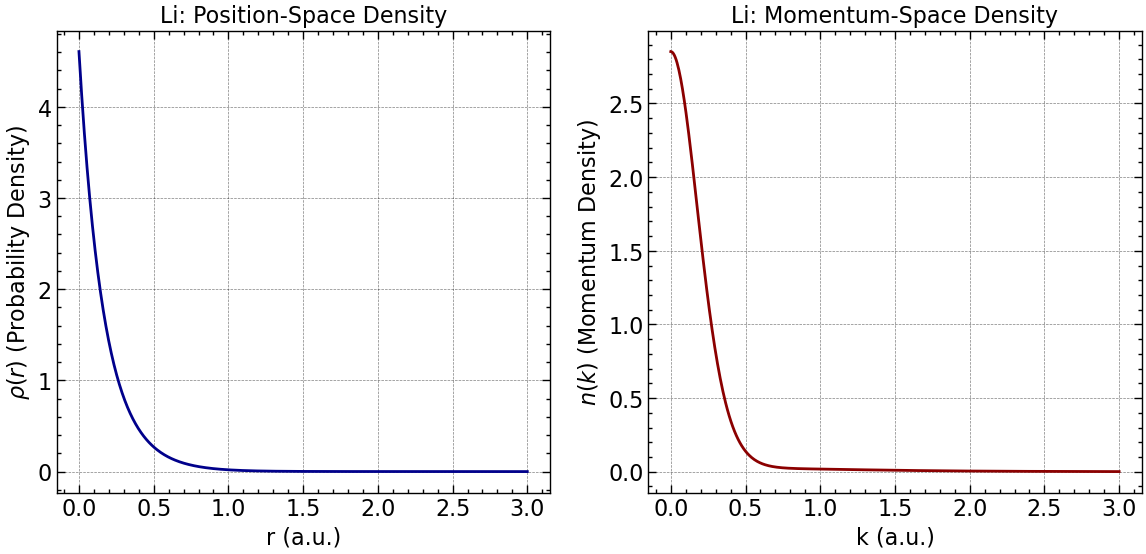

In [91]:
# Wavefunction definitions

# Radial position-space wavefunction
def R1s(r):
    return 0.141279 * sr1s(4.3069,r) + 0.874231 * sr1s(2.4573,r) -0.005201 * sr3s(6.7850,r) -0.002307 * sr2s(7.4527,r) + 0.006985 * sr2s(1.8504,r) -0.000305 * sr2s(0.7667,r) +0.000760*sr2s(0.6364,r)
def R2s(r):
    return -0.022416 * sr1s(4.3069,r) - 0.135791 * sr1s(2.4573,r) + 0.000389 * sr3s(6.7850,r) -0.000068 * sr2s(7.4527,r) - 0.076544 * sr2s(1.8504,r) + 0.340542 * sr2s(0.7667,r) +0.715708 * sr2s(0.6364,r)

# Radial momentum-space wavefunction
def K1s(k):
    return 0.141279 * sk1s(4.3069,k) + 0.874231 * sk1s(2.4573,k) -0.005201 * sk3s(6.7850,k) -0.002307 * sk2s(7.4527,k) + 0.006985 * sk2s(1.8504,k) -0.000305 * sk2s(0.7667,k) +0.000760*sk2s(0.6364,k)
def K2s(k):
    return -0.022416 * sk1s(4.3069,k) - 0.135791 * sk1s(2.4573,k) + 0.000389 * sk3s(6.7850,k) -0.000068 * sk2s(7.4527,k) - 0.076544 * sk2s(1.8504,k) + 0.340542 * sk2s(0.7667,k) +0.715708 * sk2s(0.6364,k)

# Density functions

# Electron density in position space (3 electrons)
def pr(r): 
    return 1/(4*np.pi*3) * (2*R1s(r)**2 + R2s(r)**2)

# Electron density in momentum space
def nk(k): 
    return 1/(4*np.pi*3) * (2*K1s(k)**2 + K2s(k)**2) 

# Normalization checks
def NIntegrate_1(r):
    return 4 * np.pi * pr(r) * r**2

Norm_r,error_r = quad(NIntegrate_1, 0, np.inf)

def NIntegrate_2(k):
    return 4 * np.pi * nk(k) * k**2

Norm_k,error_k = quad(NIntegrate_2, 0, np.inf)

# Shannon entropies calculation

# Position-space entropy
def NIntegrate_Sr(r):
    p = pr(r)
    # Handle cases where p(r) might be 0 (log(0) is undefined)
    if p == 0:
        return 0
    return -4 * np.pi * p * np.log(p) * r**2

Sr, error_Sr = quad(NIntegrate_Sr, 0, np.inf)

# Momentum-space entropy
def NIntegrate_Sk(k):
    # Handle cases where nk(k) might be 0 (log(0) is undefined)
    if nk(k)== 0:
        return 0
    return -4 * np.pi * nk(k) * np.log(nk(k)) * k**2

Sk, error_Sk = quad(NIntegrate_Sk, 0, np.inf)

# Total Shannon entropy
S_tot = Sr + Sk

# Expectation values
def NIntegrate_r2(r):
    if pr(r)==0:
        return 0
    return 4* np.pi*pr(r) * r**4

r2, error_r2 = quad(NIntegrate_r2,0,np.inf)

def NIntegrate_k2(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k) * k**4

k2, error_k2 = quad(NIntegrate_k2,0,np.inf)

# Maximum entropy and entropy deficiency measures
Smax=3*(1+np.log(np.pi)) + 3/2 * np.log(4/9 * r2 * k2)

w=1-(Sr+Sk)/Smax

# Onisescu information energy
def NIntegrate_Er(r):
    if pr(r)==0:
        return 0
    return 4*np.pi* pr(r)**2 * r**2

Er, error_Er = quad(NIntegrate_Er,0,np.inf)

def NIntegrate_Ek(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k)**2 * k**2

Ek, error_Ek = quad(NIntegrate_Ek,0,np.inf)

Onisescu=1/(Er*Ek)

# Result output
print("\n" + "="*50)
print(f"{'LITHUIUM (Z=3) CALCULATION RESULTS':^50}")
print("="*50)

print("\n[Basic Checks]")
print(f"- Position norm: {Norm_r:.1f} (expected: 1.0)")
print(f"- Momentum norm: {Norm_k:.1f} (expected: 1.0)")

print("\n[Information Measures]")
print(f"- Position entropy Sr: {Sr:.5f}")
print(f"- Momentum entropy Sk: {Sk:.5f}")
print(f"- Total entropy S: {S_tot:.5f}")
print(f"- Max entropy Smax: {Smax:.5f}")
print(f"- Entropy deficiency Ω: {w:.5f}")
print(f"- Onisescu info energy: {Onisescu:.5f}")
print("\n")

# Density plots
r_vals=np.linspace(0, 3, 500)  
k_vals=np.linspace(0, 3, 500) 

pr_r = [pr(r) for r in r_vals]  
nk_k = [nk(k) for k in k_vals]  

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(r_vals, pr_r, color='darkblue')
plt.xlabel('r (a.u.)')
plt.ylabel(r'$\rho(r)$ (Probability Density)')
plt.title('Li: Position-Space Density')

plt.subplot(1, 2, 2)
plt.plot(k_vals, nk_k, color='darkred')
plt.xlabel('k (a.u.)')
plt.ylabel(r'$n(k)$ (Momentum Density)')
plt.title('Li: Momentum-Space Density')
plt.savefig('03_Li.png', dpi=300,bbox_inches='tight')
plt.show()

# Storing results
Sr_all[1]=Sr
Sk_all[1]=Sk
S_tot_all[1]=S_tot
Smax_all[1]=Smax

### Beryllium (Be), Z=4, 1s(2)2s(2)


        BERLLIUM (Z=4) CALCULATION RESULTS        

[Basic Checks]
- Position norm: 1.0 (expected: 1.0)
- Momentum norm: 1.0 (expected: 1.0)

[Information Measures]
- Position entropy Sr: 3.62386
- Momentum entropy Sk: 4.19019
- Total entropy S: 7.81405
- Max entropy Smax: 10.39503
- Entropy deficiency Ω: 0.24829
- Onisescu info energy: 8.45434




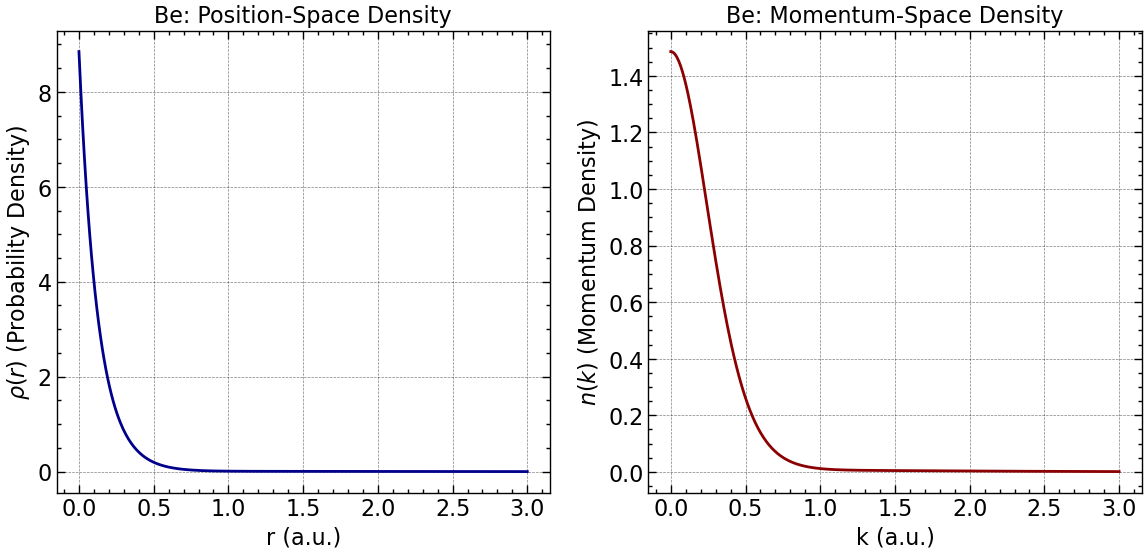

In [93]:
# Wavefunction definitions

# Radial position-space wavefunction
def R1s(r):
    return 0.285107 * sr1s(5.7531,r) + 0.474813 * sr1s(3.7156,r) -0.001620 * sr3s(9.9670,r) + 0.052852 * sr3s(3.7128,r) +0.243499 * sr2s(4.4661,r) + 0.000106 * sr2s(1.2919,r) -0.000032 * sr2s(0.8555,r)
    
def R2s(r):
    return -0.016378 * sr1s(5.7531,r) - 0.155066 * sr1s(3.7156,r) + 0.000426 *sr3s(9.9670,r) -0.059234 * sr3s(3.7128,r) -0.031925 * sr2s(4.4661,r) + 0.387968 * sr2s(1.2919,r) + 0.685674 * sr2s(0.8555,r)

# Radial momentum-space wavefunction
def K1s(k):
    return 0.285107 * sk1s(5.7531,k) + 0.474813 * sk1s(3.7156,k) -0.001620 * sk3s(9.9670,k) + 0.052852 * sk3s(3.7128,k) +0.243499 * sk2s(4.4661,k) + 0.000106 * sk2s(1.2919,k) -0.000032 * sk2s(0.8555,k)
def K2s(k):
    return -0.016378 * sk1s(5.7531,k) - 0.155066 * sk1s(3.7156,k) + 0.000426 * sk3s(9.9670,k) - 0.059234 * sk3s(3.7128,k) - 0.031925 * sk2s(4.4661,k) + 0.387968 * sk2s(1.2919,k) + 0.685674 * sk2s(0.8555,k)

# Density functions

# Electron density in position space (4 electrons)
def pr(r): 
    return 1/(4*np.pi*4) * (2*R1s(r)**2 + 2*R2s(r)**2)

# Electron density in momentum space
def nk(k): 
    return 1/(4*np.pi*4) * (2*K1s(k)**2 + 2*K2s(k)**2) 

# Normalization checks
def NIntegrate_1(r):
    return 4 * np.pi * pr(r) * r**2

Norm_r,error_r = quad(NIntegrate_1, 0, np.inf)

def NIntegrate_2(k):
    return 4 * np.pi * nk(k) * k**2

Norm_k,error_k = quad(NIntegrate_2, 0, np.inf)

# Shannon entropies calculation

# Position-space entropy
def NIntegrate_Sr(r):
    p = pr(r)
    # Handle cases where p(r) might be 0 (log(0) is undefined)
    if p == 0:
        return 0
    return -4 * np.pi * p * np.log(p) * r**2

Sr, error_Sr = quad(NIntegrate_Sr, 0, np.inf)

# Momentum-space entropy
def NIntegrate_Sk(k):
    # Handle cases where nk(k) might be 0 (log(0) is undefined)
    if nk(k)== 0:
        return 0
    return -4 * np.pi * nk(k) * np.log(nk(k)) * k**2

Sk, error_Sk = quad(NIntegrate_Sk, 0, np.inf)

# Total Shannon entropy
S_tot = Sr + Sk

# Expectation values
def NIntegrate_r2(r):
    if pr(r)==0:
        return 0
    return 4* np.pi*pr(r) * r**4

r2, error_r2 = quad(NIntegrate_r2,0,np.inf)

def NIntegrate_k2(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k) * k**4

k2, error_k2 = quad(NIntegrate_k2,0,np.inf)

# Maximum entropy  and entropy deficiency measures
Smax=3*(1+np.log(np.pi)) + 3/2 * np.log(4/9 * r2 * k2)

w=1-(Sr+Sk)/Smax

# Onisescu information energy
def NIntegrate_Er(r):
    if pr(r)==0:
        return 0
    return 4*np.pi* pr(r)**2 * r**2

Er, error_Er = quad(NIntegrate_Er,0,np.inf)

def NIntegrate_Ek(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k)**2 * k**2

Ek, error_Ek = quad(NIntegrate_Ek,0,np.inf)

Onisescu=1/(Er*Ek)

# Results ouput
print("\n" + "="*50)
print(f"{'BERLLIUM (Z=4) CALCULATION RESULTS':^50}")
print("="*50)

print("\n[Basic Checks]")
print(f"- Position norm: {Norm_r:.1f} (expected: 1.0)")
print(f"- Momentum norm: {Norm_k:.1f} (expected: 1.0)")

print("\n[Information Measures]")
print(f"- Position entropy Sr: {Sr:.5f}")
print(f"- Momentum entropy Sk: {Sk:.5f}")
print(f"- Total entropy S: {S_tot:.5f}")
print(f"- Max entropy Smax: {Smax:.5f}")
print(f"- Entropy deficiency Ω: {w:.5f}")
print(f"- Onisescu info energy: {Onisescu:.5f}")
print("\n")

# Density plots
r_vals=np.linspace(0, 3, 500)  
k_vals=np.linspace(0, 3, 500) 

pr_r = [pr(r) for r in r_vals]  
nk_k = [nk(k) for k in k_vals]  

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(r_vals, pr_r, color='darkblue')
plt.xlabel('r (a.u.)')
plt.ylabel(r'$\rho(r)$ (Probability Density)')
plt.title('Be: Position-Space Density')

plt.subplot(1, 2, 2)
plt.plot(k_vals, nk_k, color='darkred')
plt.xlabel('k (a.u.)')
plt.ylabel(r'$n(k)$ (Momentum Density)')
plt.title('Be: Momentum-Space Density')
plt.savefig('04_Be.png', dpi=300,bbox_inches='tight')
plt.show()

# Storing results
Sr_all[2]=Sr
Sk_all[2]=Sk
S_tot_all[2]=S_tot
Smax_all[2]=Smax

### Boron (B), Z=5, 1s(2)2s(2)2p(1)


         BORON (Z=5) CALCULATION RESULTS          

[Basic Checks]
- Position norm: 1.0 (expected: 1.0)
- Momentum norm: 1.0 (expected: 1.0)

[Information Measures]
- Position entropy Sr: 3.40545
- Momentum entropy Sk: 4.70590
- Total entropy S: 8.11135
- Max entropy Smax: 10.37384
- Entropy deficiency Ω: 0.21810
- Onisescu info energy: 15.96532




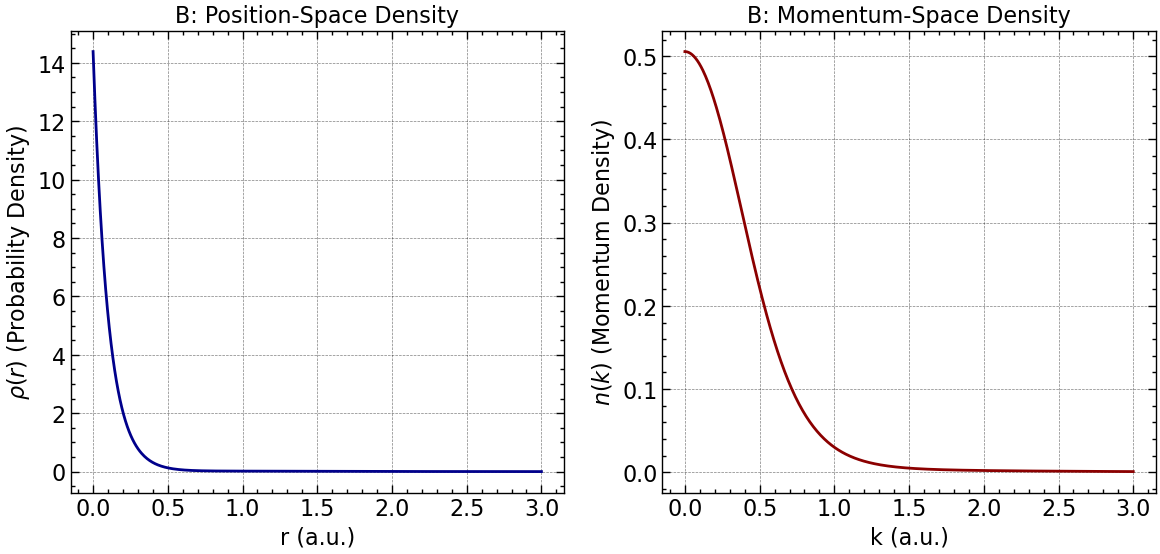

In [95]:
# Wavefunction definitions

# Radial position-space wavefunction
def R1s(r):
    return 0.381607 * sr1s(7.0178,r) + 0.423958 * sr1s(3.9468,r) -0.001316 * sr3s(12.7297,r) -0.000822 * sr3s(2.7646,r) + 0.237016 * sr2s(5.7420,r) + 0.001062 * sr2s(1.5436,r) -0.000137 * sr2s(1.0802,r)
def R2s(r):
    return -0.022549 * sr1s(7.0178,r) + 0.321716 * sr1s(3.9468,r) -0.000452 * sr3s(12.7297,r) -0.072032 * sr3s(2.7646,r) - 0.050313 * sr2s(5.7420,r) - 0.484281 * sr2s(1.5436,r) -0.518986 * sr2s(1.0802,r)
def R2p(r):
    return 0.007600 * sr2p(5.7416,r) + 0.045137 * sr2p(2.6341,r) + 0.184206 * sr2p(1.8340,r) +0.394754 * sr2p(1.1919,r) + 0.432795 * sr2p(0.8494,r)
    
# Radial momentum-space wavefunction
def K1s(k):
    return 0.381607 * sk1s(7.0178,k) + 0.423958 * sk1s(3.9468,k) - 0.001316 * sk3s(12.7297,k) - 0.000822 * sk3s(2.7646,k) + 0.237016 * sk2s(5.7420,k) + 0.001062 * sk2s(1.5436,k) - 0.000137 * sk2s(1.0802,k)
def K2s(k):
    return -0.022549 * sk1s(7.0178,k) + 0.321716 * sk1s(3.9468,k) - 0.000452 * sk3s(12.7297,k) - 0.072032 * sk3s(2.7646,k) - 0.050313 * sk2s(5.7420,k) - 0.484281 * sk2s(1.5436,k) - 0.518986 * sk2s(1.0802,k)
def K2p(k):
    return 0.007600 * sk2p(5.7416,k) + 0.045137 * sk2p(2.6341,k) + 0.184206 * sk2p(1.8340,k) + 0.394754 * sk2p(1.1919,k) + 0.432795 * sk2p(0.8494,k)

# Density functions

# Electron density in position space (5 electrons)
def pr(r): 
    return 1/(4*np.pi*5) * (2*R1s(r)**2 + 2*R2s(r)**2 + R2p(r)**2)

# Electron density in momentum space
def nk(k): 
    return 1/(4*np.pi*5) * (2*K1s(k)**2 + 2*K2s(k)**2 + K2p(k)**2) 

# Normalization checks
def NIntegrate_1(r):
    return 4 * np.pi * pr(r) * r**2

Norm_r,error_r = quad(NIntegrate_1, 0, np.inf)

def NIntegrate_2(k):
    return 4 * np.pi * nk(k) * k**2

Norm_k,error_k = quad(NIntegrate_2, 0, np.inf)

# Shannon entropies calculation

# Position-space entropy
def NIntegrate_Sr(r):
    p = pr(r)
    # Handle cases where p(r) might be 0 (log(0) is undefined)
    if p == 0:
        return 0
    return -4 * np.pi * p * np.log(p) * r**2

Sr, error_Sr = quad(NIntegrate_Sr, 0, np.inf)

# Momentum-space entropy
def NIntegrate_Sk(k):
    # Handle cases where nk(k) might be 0 (log(0) is undefined)
    if nk(k)== 0:
        return 0
    return -4 * np.pi * nk(k) * np.log(nk(k)) * k**2

Sk, error_Sk = quad(NIntegrate_Sk, 0, np.inf)

# Total Shannon entropy
S_tot = Sr + Sk

# Expectation values
def NIntegrate_r2(r):
    if pr(r)==0:
        return 0
    return 4* np.pi*pr(r) * r**4

r2, error_r2 = quad(NIntegrate_r2,0,np.inf)

def NIntegrate_k2(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k) * k**4

k2, error_k2 = quad(NIntegrate_k2,0,np.inf)


# Maximum entropy  and entropy deficiency measures
Smax=3*(1+np.log(np.pi)) + 3/2 * np.log(4/9 * r2 * k2)

w=1-(Sr+Sk)/Smax

# Onisescu information energy
def NIntegrate_Er(r):
    if pr(r)==0:
        return 0
    return 4*np.pi* pr(r)**2 * r**2

Er, error_Er = quad(NIntegrate_Er,0,np.inf)

def NIntegrate_Ek(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k)**2 * k**2

Ek, error_Ek = quad(NIntegrate_Ek,0,np.inf)

Onisescu=1/(Er*Ek)

# Results ouput
print("\n" + "="*50)
print(f"{'BORON (Z=5) CALCULATION RESULTS':^50}")
print("="*50)

print("\n[Basic Checks]")
print(f"- Position norm: {Norm_r:.1f} (expected: 1.0)")
print(f"- Momentum norm: {Norm_k:.1f} (expected: 1.0)")

print("\n[Information Measures]")
print(f"- Position entropy Sr: {Sr:.5f}")
print(f"- Momentum entropy Sk: {Sk:.5f}")
print(f"- Total entropy S: {S_tot:.5f}")
print(f"- Max entropy Smax: {Smax:.5f}")
print(f"- Entropy deficiency Ω: {w:.5f}")
print(f"- Onisescu info energy: {Onisescu:.5f}")
print("\n")

# Density plots
r_vals=np.linspace(0, 3, 500)  
k_vals=np.linspace(0, 3, 500) 

pr_r = [pr(r) for r in r_vals]  
nk_k = [nk(k) for k in k_vals]  

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(r_vals, pr_r, color='darkblue')
plt.xlabel('r (a.u.)')
plt.ylabel(r'$\rho(r)$ (Probability Density)')
plt.title('B: Position-Space Density')

plt.subplot(1, 2, 2)
plt.plot(k_vals, nk_k, color='darkred')
plt.xlabel('k (a.u.)')
plt.ylabel(r'$n(k)$ (Momentum Density)')
plt.title('B: Momentum-Space Density')
plt.savefig('05_B.png', dpi=300,bbox_inches='tight')
plt.show()

# Storing results
Sr_all[3]=Sr
Sk_all[3]=Sk
S_tot_all[3]=S_tot
Smax_all[3]=Smax

### Carbon (C), Z=6, 1s(2)2s(s)2p(2)


         CARBON (Z=6) CALCULATION RESULTS         

[Basic Checks]
- Position norm: 1.0 (expected: 1.0)
- Momentum norm: 1.0 (expected: 1.0)

[Information Measures]
- Position entropy Sr: 3.10602
- Momentum entropy Sk: 5.15658
- Total entropy S: 8.26260
- Max entropy Smax: 10.26242
- Entropy deficiency Ω: 0.19487
- Onisescu info energy: 25.71213




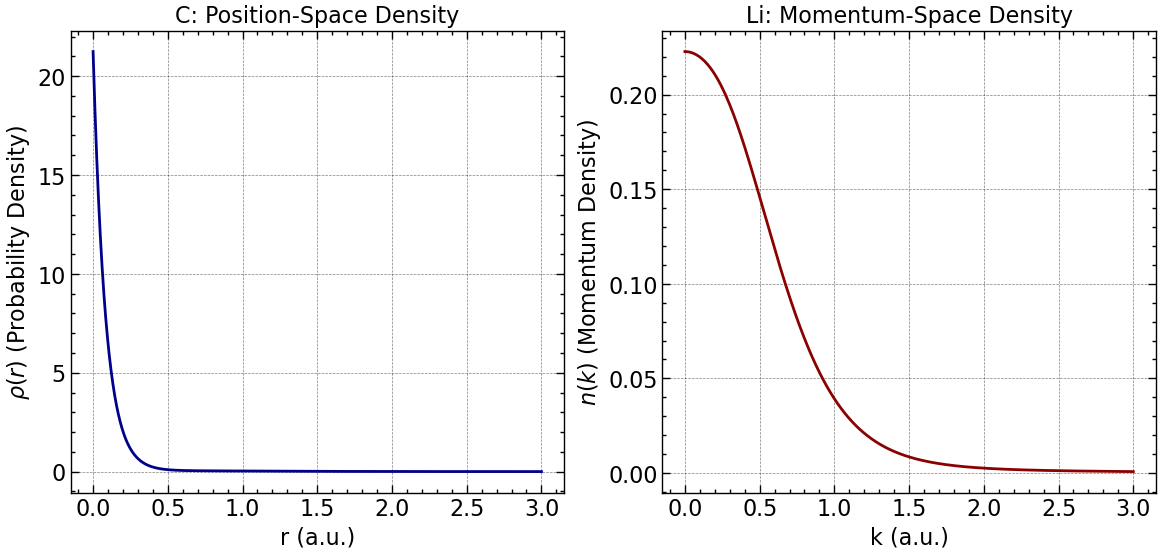

In [97]:
# Wavefunction definitions

# Radial position-space wavefunction
def R1s(r):
    return 0.352872 * sr1s(8.4936,r) + 0.473621 * sr1s(4.8788,r) -0.001199 * sr3s(15.4660,r) +0.210887 * sr2s(7.0500,r) + 0.000886 * sr2s(2.2640,r) + 0.000465 * sr2s(1.4747,r) -0.000119 * sr2s(1.1639,r)
def R2s(r):
    return -0.071727 * sr1s(8.4936,r) + 0.438307 * sr1s(4.8788,r) -0.000383 * sr3s(15.4660,r) -0.091194 * sr2s(7.0500,r) -0.393105 * sr2s(2.2640,r) -0.579121 * sr2s(1.4747,r) -0.126067 * sr2s(1.1639,r)
def R2p(r):
    return 0.006977 * sr2p(7.0500,r) + 0.070877 * sr2p(3.2275,r) + 0.230802 * sr2p(2.1908,r) + 0.411931 * sr2p(1.4413,r) + 0.350701 * sr2p(1.0242,r)
    
# Radial momentum-space wavefunction
def K1s(k):
    return 0.352872 * sk1s(8.4936,k) + 0.473621 * sk1s(4.8788,k) - 0.001199 * sk3s(15.4660,k) + 0.210887 * sk2s(7.0500,k) + 0.000886 * sk2s(2.2640,k) + 0.000465 * sk2s(1.4747,k) - 0.000119 * sk2s(1.1639,k)
def K2s(k):
    return -0.071727 * sk1s(8.4936,k) + 0.438307 * sk1s(4.8788,k) - 0.000383 * sk3s(15.4660,k) - 0.091194 * sk2s(7.0500,k) - 0.393105 * sk2s(2.2640,k) - 0.579121 * sk2s(1.4747,k) - 0.126067 * sk2s(1.1639,k)
def K2p(k):
    return 0.006977 * sk2p(7.0500,k) + 0.070877 * sk2p(3.2275,k) + 0.230802 * sk2p(2.1908,k) + 0.411931 * sk2p(1.4413,k) + 0.350701 * sk2p(1.0242,k)

# Density functions

# Electron density in position space (6 electrons)
def pr(r): 
    return 1/(4*np.pi*6) * (2*R1s(r)**2 + 2*R2s(r)**2 + 2*R2p(r)**2)

# Electron density in momentum space
def nk(k): 
    return 1/(4*np.pi*6) * (2*K1s(k)**2 + 2*K2s(k)**2 + 2*K2p(k)**2) 

# Normalization checks
def NIntegrate_1(r):
    return 4 * np.pi * pr(r) * r**2

Norm_r,error_r = quad(NIntegrate_1, 0, np.inf)

def NIntegrate_2(k):
    return 4 * np.pi * nk(k) * k**2

Norm_k,error_k = quad(NIntegrate_2, 0, np.inf)

# Shannon entropies calculation

# Position-space entropy
def NIntegrate_Sr(r):
    p = pr(r)
    # Handle cases where p(r) might be 0 (log(0) is undefined)
    if p == 0:
        return 0
    return -4 * np.pi * p * np.log(p) * r**2

Sr, error_Sr = quad(NIntegrate_Sr, 0, np.inf)

# Momentum-space entropy
def NIntegrate_Sk(k):
    # Handle cases where nk(k) might be 0 (log(0) is undefined)
    if nk(k)== 0:
        return 0
    return -4 * np.pi * nk(k) * np.log(nk(k)) * k**2

Sk, error_Sk = quad(NIntegrate_Sk, 0, np.inf)

# Total Shannon entropy
S_tot = Sr + Sk

# Expectation values
def NIntegrate_r2(r):
    if pr(r)==0:
        return 0
    return 4* np.pi*pr(r) * r**4

r2, error_r2 = quad(NIntegrate_r2,0,np.inf)

def NIntegrate_k2(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k) * k**4

k2, error_k2 = quad(NIntegrate_k2,0,np.inf)


# Maximum entropy  and entropy deficiency measures
Smax=3*(1+np.log(np.pi)) + 3/2 * np.log(4/9 * r2 * k2)

w=1-(Sr+Sk)/Smax

# Onisescu information energy
def NIntegrate_Er(r):
    if pr(r)==0:
        return 0
    return 4*np.pi* pr(r)**2 * r**2

Er, error_Er = quad(NIntegrate_Er,0,np.inf)

def NIntegrate_Ek(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k)**2 * k**2

Ek, error_Ek = quad(NIntegrate_Ek,0,np.inf)

Onisescu=1/(Er*Ek)

# Results output
print("\n" + "="*50)
print(f"{'CARBON (Z=6) CALCULATION RESULTS':^50}")
print("="*50)

print("\n[Basic Checks]")
print(f"- Position norm: {Norm_r:.1f} (expected: 1.0)")
print(f"- Momentum norm: {Norm_k:.1f} (expected: 1.0)")

print("\n[Information Measures]")
print(f"- Position entropy Sr: {Sr:.5f}")
print(f"- Momentum entropy Sk: {Sk:.5f}")
print(f"- Total entropy S: {S_tot:.5f}")
print(f"- Max entropy Smax: {Smax:.5f}")
print(f"- Entropy deficiency Ω: {w:.5f}")
print(f"- Onisescu info energy: {Onisescu:.5f}")
print("\n")

# Density plots
r_vals=np.linspace(0, 3, 500)  
k_vals=np.linspace(0, 3, 500) 

pr_r = [pr(r) for r in r_vals]  
nk_k = [nk(k) for k in k_vals]  

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(r_vals, pr_r, color='darkblue')
plt.xlabel('r (a.u.)')
plt.ylabel(r'$\rho(r)$ (Probability Density)')
plt.title('C: Position-Space Density')

plt.subplot(1, 2, 2)
plt.plot(k_vals, nk_k, color='darkred')
plt.xlabel('k (a.u.)')
plt.ylabel(r'$n(k)$ (Momentum Density)')
plt.title('Li: Momentum-Space Density')
plt.savefig('06_C.png', dpi=300,bbox_inches='tight')
plt.show()

# Storing results
Sr_all[4]=Sr
Sk_all[4]=Sk
S_tot_all[4]=S_tot
Smax_all[4]=Smax

### Nitrogen (N), Z=7, 1s(2)2s(2)2p(3)


        NITROGEN (Z=7) CALCULATION RESULTS        

[Basic Checks]
- Position norm: 1.0 (expected: 1.0)
- Momentum norm: 1.0 (expected: 1.0)

[Information Measures]
- Position entropy Sr: 2.80169
- Momentum entropy Sk: 5.54934
- Total entropy S: 8.35103
- Max entropy Smax: 10.15197
- Entropy deficiency Ω: 0.17740
- Onisescu info energy: 37.43198




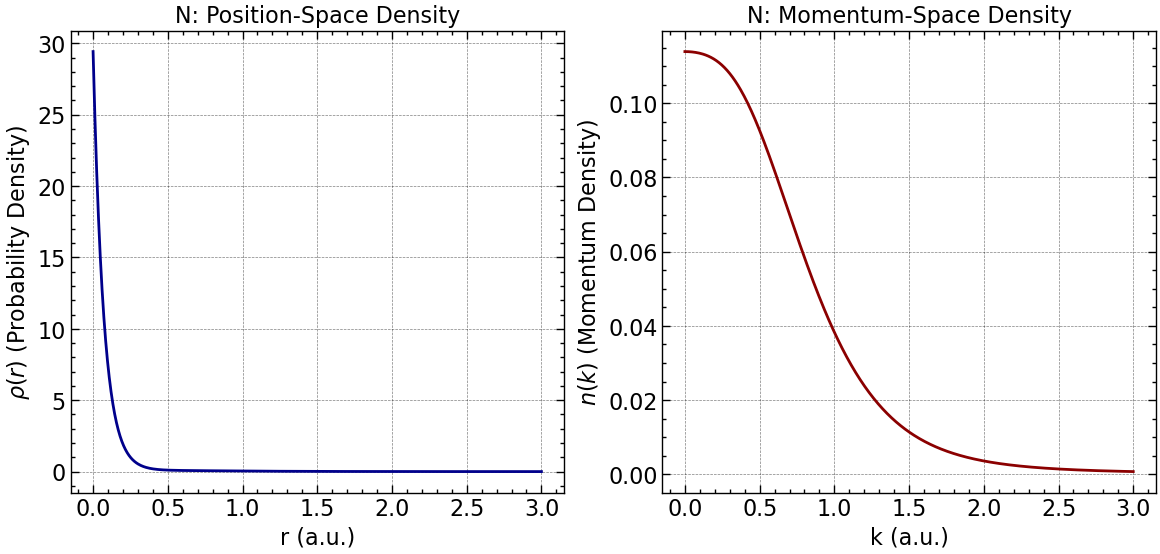

In [99]:
# Wavefunction definitions

# Radial position-space wavefunction
def R1s(r):
    return 0.354839 * sr1s(9.9051,r) + 0.472579 * sr1s(5.7429,r) -0.001038 * sr3s(17.9816,r) +0.208492 * sr2s(8.3087,r) + 0.001687 * sr2s(2.7611,r) + 0.000206 * sr2s(1.8223,r) + 0.000064*sr2s(1.4191,r)                                        
def R2s(r):
    return -0.067498 * sr1s(9.9051,r) +0.434142 * sr1s(5.7429,r) -0.000315 * sr3s(17.9816,r) -0.080331 * sr2s(8.3087,r) -0.374128 * sr2s(2.7611,r) - 0.522775 * sr2s(1.8223,r) - 0.207735 * sr2s(1.4191,r)
def R2p(r):
    return 0.006323 * sr2p(8.3490,r) + 0.082938 * sr2p(3.8827,r) +0.260147 * sr2p(2.5920,r) + 0.418361 * sr2p(1.6946,r) +0.308272 * sr2p(1.1914,r)
    
# Radial momentum-space wavefunction
def K1s(k):
    return 0.354839 * sk1s(9.9051,k) + 0.472579 * sk1s(5.7429,k) - 0.001038 * sk3s(17.9816,k) + 0.208492 * sk2s(8.3087,k) + 0.001687 * sk2s(2.7611,k) + 0.000206 * sk2s(1.8223,k) + 0.000064 * sk2s(1.4191,k)
def K2s(k):
    return -0.067498 * sk1s(9.9051,k) + 0.434142 * sk1s(5.7429,k) - 0.000315 * sk3s(17.9816,k) - 0.080331 * sk2s(8.3087,k) - 0.374128 * sk2s(2.7611,k) - 0.522775 * sk2s(1.8223,k) - 0.207735 * sk2s(1.4191,k)
def K2p(k):
    return 0.006323 * sk2p(8.3490,k) + 0.082938 * sk2p(3.8827,k) + 0.260147 * sk2p(2.5920,k) + 0.418361 * sk2p(1.6946,k) + 0.308272 * sk2p(1.1914,k)

# Density functions

# Electron density in position space (7 electrons)
def pr(r): 
    return 1/(4*np.pi*7) * (2*R1s(r)**2 + 2*R2s(r)**2 + 3*R2p(r)**2)

# Electron density in momentum space
def nk(k): 
    return 1/(4*np.pi*7) * (2*K1s(k)**2 + 2*K2s(k)**2 + 3*K2p(k)**2) 

# Normalization checks
def NIntegrate_1(r):
    return 4 * np.pi * pr(r) * r**2

Norm_r,error_r = quad(NIntegrate_1, 0, np.inf)

def NIntegrate_2(k):
    return 4 * np.pi * nk(k) * k**2

Norm_k,error_k = quad(NIntegrate_2, 0, np.inf)

# Shannon entropies calculation

# Position-space entropy
def NIntegrate_Sr(r):
    p = pr(r)
    # Handle cases where p(r) might be 0 (log(0) is undefined)
    if p == 0:
        return 0
    return -4 * np.pi * p * np.log(p) * r**2

Sr, error_Sr = quad(NIntegrate_Sr, 0, np.inf)

# Momentum-space entropy
def NIntegrate_Sk(k):
    # Handle cases where nk(k) might be 0 (log(0) is undefined)
    if nk(k)== 0:
        return 0
    return -4 * np.pi * nk(k) * np.log(nk(k)) * k**2

Sk, error_Sk = quad(NIntegrate_Sk, 0, np.inf)

# Total Shannon entropy
S_tot = Sr + Sk

# Expectation values
def NIntegrate_r2(r):
    if pr(r)==0:
        return 0
    return 4* np.pi*pr(r) * r**4

r2, error_r2 = quad(NIntegrate_r2,0,np.inf)

def NIntegrate_k2(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k) * k**4

k2, error_k2 = quad(NIntegrate_k2,0,np.inf)


# Maximum entropy  and entropy deficiency measures
Smax=3*(1+np.log(np.pi)) + 3/2 * np.log(4/9 * r2 * k2)

w=1-(Sr+Sk)/Smax

# Onisescu information energy
def NIntegrate_Er(r):
    if pr(r)==0:
        return 0
    return 4*np.pi* pr(r)**2 * r**2

Er, error_Er = quad(NIntegrate_Er,0,np.inf)

def NIntegrate_Ek(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k)**2 * k**2

Ek, error_Ek = quad(NIntegrate_Ek,0,np.inf)

Onisescu=1/(Er*Ek)

# Results output
print("\n" + "="*50)
print(f"{'NITROGEN (Z=7) CALCULATION RESULTS':^50}")
print("="*50)

print("\n[Basic Checks]")
print(f"- Position norm: {Norm_r:.1f} (expected: 1.0)")
print(f"- Momentum norm: {Norm_k:.1f} (expected: 1.0)")

print("\n[Information Measures]")
print(f"- Position entropy Sr: {Sr:.5f}")
print(f"- Momentum entropy Sk: {Sk:.5f}")
print(f"- Total entropy S: {S_tot:.5f}")
print(f"- Max entropy Smax: {Smax:.5f}")
print(f"- Entropy deficiency Ω: {w:.5f}")
print(f"- Onisescu info energy: {Onisescu:.5f}")
print("\n")

# Density plots
r_vals=np.linspace(0, 3, 500)  
k_vals=np.linspace(0, 3, 500) 

pr_r = [pr(r) for r in r_vals]  
nk_k = [nk(k) for k in k_vals]  

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(r_vals, pr_r, color='darkblue')
plt.xlabel('r (a.u.)')
plt.ylabel(r'$\rho(r)$ (Probability Density)')
plt.title('N: Position-Space Density')

plt.subplot(1, 2, 2)
plt.plot(k_vals, nk_k, color='darkred')
plt.xlabel('k (a.u.)')
plt.ylabel(r'$n(k)$ (Momentum Density)')
plt.title('N: Momentum-Space Density')
plt.savefig('07_N.png', dpi=300,bbox_inches='tight')
plt.show()

# Storing results
Sr_all[5]=Sr
Sk_all[5]=Sk
S_tot_all[5]=S_tot
Smax_all[5]=Smax

### Oxygen (O), Z=8, 1s(2)2s(2)2p(4)


         OXYGEN (Z=8) CALCULATION RESULTS         

[Basic Checks]
- Position norm: 1.0 (expected: 1.0)
- Momentum norm: 1.0 (expected: 1.0)

[Information Measures]
- Position entropy Sr: 2.55054
- Momentum entropy Sk: 5.86735
- Total entropy S: 8.41789
- Max entropy Smax: 10.11127
- Entropy deficiency Ω: 0.16747
- Onisescu info energy: 48.48377




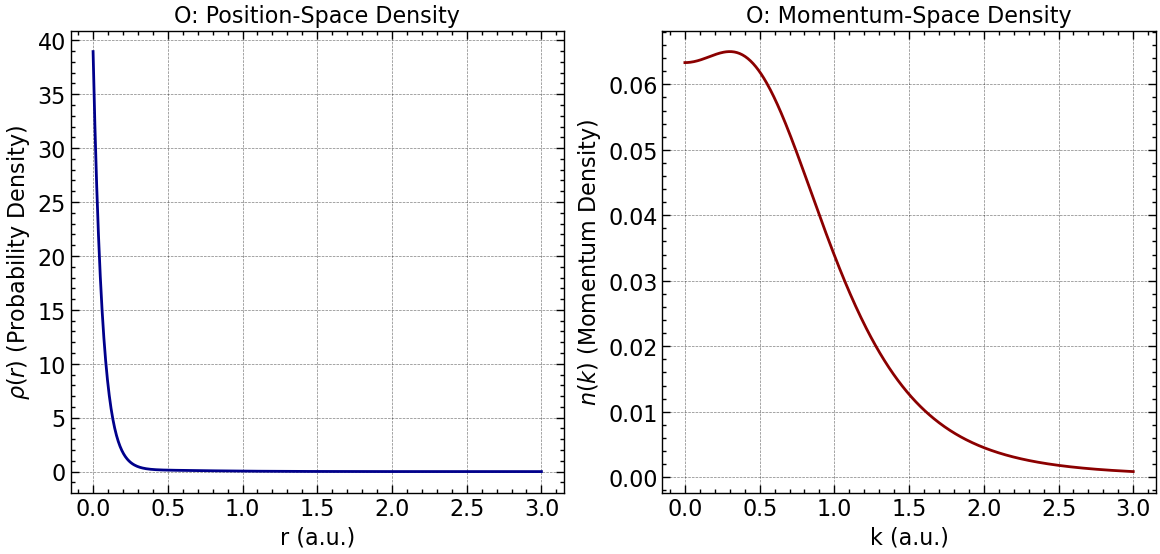

In [101]:
# Wavefunction definitions

# Radial position-space wavefunction
def R1s(r):
    return 0.360063 * sr1s(11.2970,r) + 0.466625 * sr1s(6.5966,r) - 0.000918 * sr3s(20.5019,r) + 0.208441 * sr2s(9.5546,r) + 0.002018 * sr2s(3.2482,r) + 0.000216 * sr2s(2.1608,r) + 0.000133 * sr2s(1.6411,r)
def R2s(r):
    return -0.064363 * sr1s(11.2970,r) + 0.433186 * sr1s(6.5966,r) -0.000275 * sr3s(20.5019,r) - 0.072497 * sr2s(9.5546,r) - 0.369900 * sr2s(3.2482,r) - 0.512627 * sr2s(2.1608,r) - 0.227421 * sr2s(1.6411,r)
def R2p(r):
    return 0.005626 * sr2p(9.6471,r) + 0.126618 * sr2p(4.3323,r) + 0.328966 * sr2p(2.7502,r) + 0.395422 * sr2p(1.7525,r) + 0.231788 * sr2p(1.2473,r)
    
# Radial momentum-space wavefunction
def K1s(k):
    return 0.360063 * sk1s(11.2970,k) + 0.466625 * sk1s(6.5966,k) - 0.000918 * sk3s(20.5019,k) + 0.208441 * sk2s(9.5546,k) + 0.002018 * sk2s(3.2482,k) + 0.000216 * sk2s(2.1608,k) + 0.000133 * sk2s(1.6411,k)
def K2s(k):
    return -0.064363 * sk1s(11.2970,k) + 0.433186 * sk1s(6.5966,k) - 0.000275 * sk3s(20.5019,k) - 0.072497 * sk2s(9.5546,k) - 0.369900 * sk2s(3.2482,k) - 0.512627 * sk2s(2.1608,k) - 0.227421 * sk2s(1.6411,k)
def K2p(k):
    return 0.005626 * sk2p(9.6471,k) + 0.126618 * sk2p(4.3323,k) + 0.328966 * sk2p(2.7502,k) + 0.395422 * sk2p(1.7525,k) + 0.231788 * sk2p(1.2473,k)

# Density functions

# Electron density in position space (8 electrons)
def pr(r): 
    return 1/(4*np.pi*8) * (2*R1s(r)**2 + 2*R2s(r)**2 + 4*R2p(r)**2)

# Electron density in momentum space
def nk(k): 
    return 1/(4*np.pi*8) * (2*K1s(k)**2 + 2*K2s(k)**2 + 4*K2p(k)**2) 

# Normalization checks
def NIntegrate_1(r):
    return 4 * np.pi * pr(r) * r**2

Norm_r,error_r = quad(NIntegrate_1, 0, np.inf)

def NIntegrate_2(k):
    return 4 * np.pi * nk(k) * k**2

Norm_k,error_k = quad(NIntegrate_2, 0, np.inf)

# Shannon entropies calculation

# Position-space entropy
def NIntegrate_Sr(r):
    p = pr(r)
    # Handle cases where p(r) might be 0 (log(0) is undefined)
    if p == 0:
        return 0
    return -4 * np.pi * p * np.log(p) * r**2

Sr, error_Sr = quad(NIntegrate_Sr, 0, np.inf)

# Momentum-space entropy
def NIntegrate_Sk(k):
    # Handle cases where nk(k) might be 0 (log(0) is undefined)
    if nk(k)== 0:
        return 0
    return -4 * np.pi * nk(k) * np.log(nk(k)) * k**2

Sk, error_Sk = quad(NIntegrate_Sk, 0, np.inf)

# Total Shannon entropy
S_tot = Sr + Sk

# Expectation values
def NIntegrate_r2(r):
    if pr(r)==0:
        return 0
    return 4* np.pi*pr(r) * r**4

r2, error_r2 = quad(NIntegrate_r2,0,np.inf)

def NIntegrate_k2(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k) * k**4

k2, error_k2 = quad(NIntegrate_k2,0,np.inf)


# Maximum entropy  and entropy deficiency measures
Smax=3*(1+np.log(np.pi)) + 3/2 * np.log(4/9 * r2 * k2)

w=1-(Sr+Sk)/Smax

# Onisescu information energy
def NIntegrate_Er(r):
    if pr(r)==0:
        return 0
    return 4*np.pi* pr(r)**2 * r**2

Er, error_Er = quad(NIntegrate_Er,0,np.inf)

def NIntegrate_Ek(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k)**2 * k**2

Ek, error_Ek = quad(NIntegrate_Ek,0,np.inf)

Onisescu=1/(Er*Ek)

# Results output
print("\n" + "="*50)
print(f"{'OXYGEN (Z=8) CALCULATION RESULTS':^50}")
print("="*50)

print("\n[Basic Checks]")
print(f"- Position norm: {Norm_r:.1f} (expected: 1.0)")
print(f"- Momentum norm: {Norm_k:.1f} (expected: 1.0)")

print("\n[Information Measures]")
print(f"- Position entropy Sr: {Sr:.5f}")
print(f"- Momentum entropy Sk: {Sk:.5f}")
print(f"- Total entropy S: {S_tot:.5f}")
print(f"- Max entropy Smax: {Smax:.5f}")
print(f"- Entropy deficiency Ω: {w:.5f}")
print(f"- Onisescu info energy: {Onisescu:.5f}")
print("\n")

# Density plots
r_vals=np.linspace(0, 3, 500)  
k_vals=np.linspace(0, 3, 500) 

pr_r = [pr(r) for r in r_vals]  
nk_k = [nk(k) for k in k_vals]  

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(r_vals, pr_r, color='darkblue')
plt.xlabel('r (a.u.)')
plt.ylabel(r'$\rho(r)$ (Probability Density)')
plt.title('O: Position-Space Density')

plt.subplot(1, 2, 2)
plt.plot(k_vals, nk_k, color='darkred')
plt.xlabel('k (a.u.)')
plt.ylabel(r'$n(k)$ (Momentum Density)')
plt.title('O: Momentum-Space Density')
plt.savefig('08_O.png', dpi=300,bbox_inches='tight')
plt.show()

# Storing results
Sr_all[6]=Sr
Sk_all[6]=Sk
S_tot_all[6]=S_tot
Smax_all[6]=Smax

### Fluorine (F), Z=9, 1s(2)2s(2)2p(5)


        FLUORINE (Z=9) CALCULATION RESULTS        

[Basic Checks]
- Position norm: 1.0 (expected: 1.0)
- Momentum norm: 1.0 (expected: 1.0)

[Information Measures]
- Position entropy Sr: 2.29883
- Momentum entropy Sk: 6.16333
- Total entropy S: 8.46215
- Max entropy Smax: 10.05328
- Entropy deficiency Ω: 0.15827
- Onisescu info energy: 61.14500




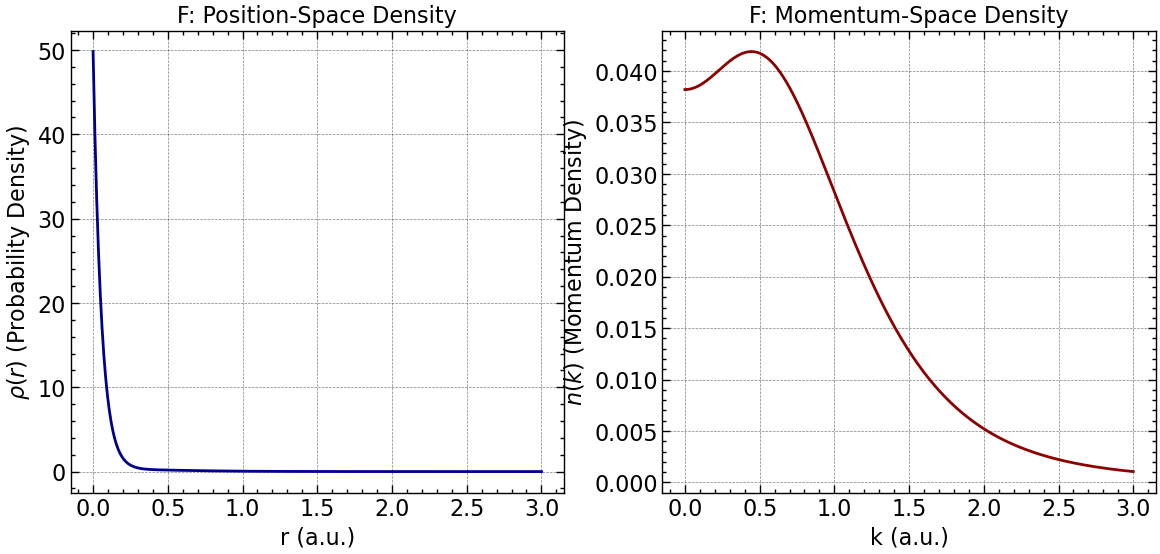

In [103]:
# Wavefunction definitions

# Radial position-space wavefunction
def R1s(r):
    return 0.377498 * sr1s(12.6074,r) + 0.443947 * sr1s(7.4101,r) - 0.000797 * sr3s(23.2475,r) + 0.213846 * sr2s(10.7416,r) + 0.002183 * sr2s(3.7543,r) + 0.000335 * sr2s(2.5009,r) + 0.000147 * sr2s(1.8577,r)
def R2s(r):
    return -0.058489 * sr1s(12.6074,r) + 0.426450 * sr1s(7.4101,r) - 0.000274 * sr3s(23.2475,r) -0.063457 * sr2s(10.7416,r) -0.358939 * sr2s(3.7543,r) -0.516660 * sr2s(2.5009,r) -0.239143* sr2s(1.8577,r)
def R2p(r):
    return 0.004879 * sr2p(11.0134,r) + 0.130794 * sr2p(4.9962,r) + 0.337876 * sr2p(3.1540,r) + 0.396122 * sr2p(1.9722,r) + 0.225374 * sr2p(1.3632,r)
    
# Radial momentum-space wavefunction
def K1s(k):
    return 0.377498 * sk1s(12.6074,k) + 0.443947 * sk1s(7.4101,k) - 0.000797 * sk3s(23.2475,k) + 0.213846 * sk2s(10.7416,k) + 0.002183 * sk2s(3.7543,k) + 0.000335 * sk2s(2.5009,k) + 0.000147 * sk2s(1.8577,k)
def K2s(k):
    return -0.058489 * sk1s(12.6074,k) + 0.426450 * sk1s(7.4101,k) - 0.000274 * sk3s(23.2475,k) - 0.063457 * sk2s(10.7416,k) - 0.358939 * sk2s(3.7543,k) - 0.516660 * sk2s(2.5009,k) - 0.239143 * sk2s(1.8577,k)
def K2p(k):
    return 0.004879 * sk2p(11.0134,k) + 0.130794 * sk2p(4.9962,k) + 0.337876 * sk2p(3.1540,k) + 0.396122 * sk2p(1.9722,k) + 0.225374 * sk2p(1.3632,k)

# Density functions

# Electron density in position space (9 electrons)
def pr(r): 
    return 1/(4*np.pi*9) * (2*R1s(r)**2 + 2*R2s(r)**2 + 5*R2p(r)**2)

# Electron density in momentum space
def nk(k): 
    return 1/(4*np.pi*9) * (2*K1s(k)**2 + 2*K2s(k)**2 + 5*K2p(k)**2) 

# Normalization checks
def NIntegrate_1(r):
    return 4 * np.pi * pr(r) * r**2

Norm_r,error_r = quad(NIntegrate_1, 0, np.inf)

def NIntegrate_2(k):
    return 4 * np.pi * nk(k) * k**2

Norm_k,error_k = quad(NIntegrate_2, 0, np.inf)

# Shannon entropies calculation

# Position-space entropy
def NIntegrate_Sr(r):
    p = pr(r)
    # Handle cases where p(r) might be 0 (log(0) is undefined)
    if p == 0:
        return 0
    return -4 * np.pi * p * np.log(p) * r**2

Sr, error_Sr = quad(NIntegrate_Sr, 0, np.inf)

# Momentum-space entropy
def NIntegrate_Sk(k):
    # Handle cases where nk(k) might be 0 (log(0) is undefined)
    if nk(k)== 0:
        return 0
    return -4 * np.pi * nk(k) * np.log(nk(k)) * k**2

Sk, error_Sk = quad(NIntegrate_Sk, 0, np.inf)

# Total Shannon entropy
S_tot = Sr + Sk

# Expectation values
def NIntegrate_r2(r):
    if pr(r)==0:
        return 0
    return 4* np.pi*pr(r) * r**4

r2, error_r2 = quad(NIntegrate_r2,0,np.inf)

def NIntegrate_k2(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k) * k**4

k2, error_k2 = quad(NIntegrate_k2,0,np.inf)


# Maximum entropy  and entropy deficiency measures
Smax=3*(1+np.log(np.pi)) + 3/2 * np.log(4/9 * r2 * k2)

w=1-(Sr+Sk)/Smax

# Onisescu information energy
def NIntegrate_Er(r):
    if pr(r)==0:
        return 0
    return 4*np.pi* pr(r)**2 * r**2

Er, error_Er = quad(NIntegrate_Er,0,np.inf)

def NIntegrate_Ek(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k)**2 * k**2

Ek, error_Ek = quad(NIntegrate_Ek,0,np.inf)

Onisescu=1/(Er*Ek)

# Results output
print("\n" + "="*50)
print(f"{'FLUORINE (Z=9) CALCULATION RESULTS':^50}")
print("="*50)

print("\n[Basic Checks]")
print(f"- Position norm: {Norm_r:.1f} (expected: 1.0)")
print(f"- Momentum norm: {Norm_k:.1f} (expected: 1.0)")

print("\n[Information Measures]")
print(f"- Position entropy Sr: {Sr:.5f}")
print(f"- Momentum entropy Sk: {Sk:.5f}")
print(f"- Total entropy S: {S_tot:.5f}")
print(f"- Max entropy Smax: {Smax:.5f}")
print(f"- Entropy deficiency Ω: {w:.5f}")
print(f"- Onisescu info energy: {Onisescu:.5f}")
print("\n")

# Density plots
r_vals=np.linspace(0, 3, 500)  
k_vals=np.linspace(0, 3, 500) 

pr_r = [pr(r) for r in r_vals]  
nk_k = [nk(k) for k in k_vals]  

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(r_vals, pr_r, color='darkblue')
plt.xlabel('r (a.u.)')
plt.ylabel(r'$\rho(r)$ (Probability Density)')
plt.title('F: Position-Space Density')

plt.subplot(1, 2, 2)
plt.plot(k_vals, nk_k, color='darkred')
plt.xlabel('k (a.u.)')
plt.ylabel(r'$n(k)$ (Momentum Density)')
plt.title('F: Momentum-Space Density')
plt.savefig('09_F.png', dpi=300,bbox_inches='tight')
plt.show()

# Storing results
Sr_all[7]=Sr
Sk_all[7]=Sk
S_tot_all[7]=S_tot
Smax_all[7]=Smax

### Neon (Ne), Z=10, 1s(2)2s(2)2p(6)


         NEON (Z=10) CALCULATION RESULTS          

[Basic Checks]
- Position norm: 1.0 (expected: 1.0)
- Momentum norm: 1.0 (expected: 1.0)

[Information Measures]
- Position entropy Sr: 2.05514
- Momentum entropy Sk: 6.43707
- Total entropy S: 8.49221
- Max entropy Smax: 9.99077
- Entropy deficiency Ω: 0.14999
- Onisescu info energy: 75.24471




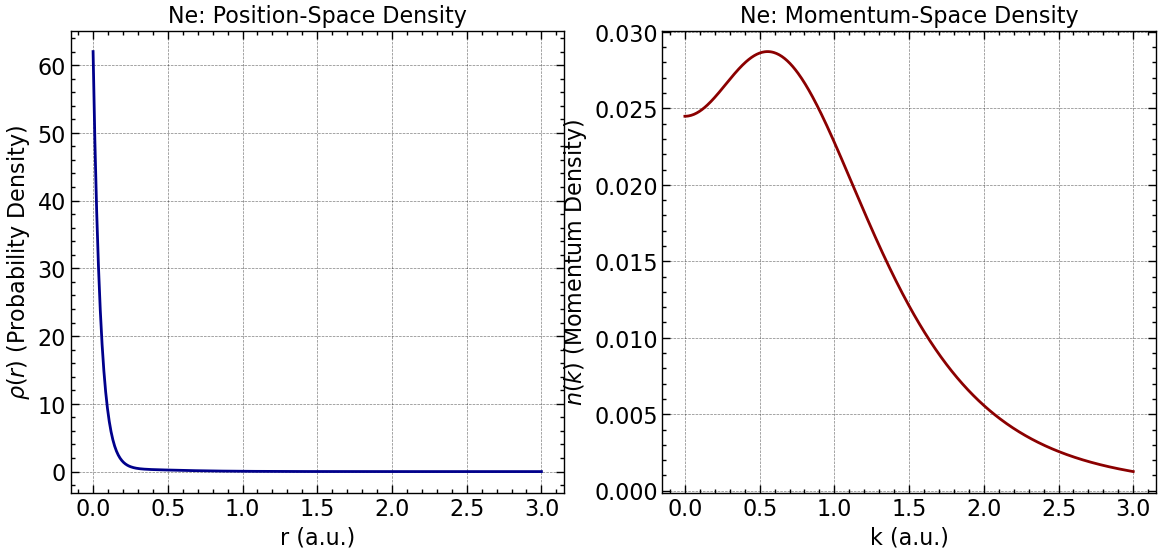

In [105]:
# Wavefunction definitions

# Radial position-space wavefunction
def R1s(r):
    return 0.392290 * sr1s(13.9074, r) + 0.425817 * sr1s(8.2187, r) - 0.000702 * sr3s(26.0325, r) + 0.217206 * sr2s(11.9249, r) + 0.002300 * sr2s(4.2635, r) + 0.000463 * sr2s(2.8357, r) + 0.000147 * sr2s(2.0715, r)
def R2s(r):
    return -0.053023 * sr1s(13.9074, r) + 0.419502 * sr1s(8.2187, r) - 0.000263 * sr3s(26.0325, r) - 0.055723 * sr2s(11.9249, r) - 0.349457 * sr2s(4.2635, r) - 0.523070 * sr2s(2.8357, r) - 0.246038 * sr2s(2.0715, r)
def R2p(r):
    return 0.004391 * sr2p(12.3239, r) + 0.133955 * sr2p(5.6525, r) + 0.342978 * sr2p(3.5570, r) + 0.395742 * sr2p(2.2056, r) + 0.221831 * sr2p(1.4948, r)
    
# Radial momentum-space wavefunction
def K1s(k):
    return 0.392290 * sk1s(13.9074, k) + 0.425817 * sk1s(8.2187, k) - 0.000702 * sk3s(26.0325, k) + 0.217206 * sk2s(11.9249, k) + 0.002300 * sk2s(4.2635, k) + 0.000463 * sk2s(2.8357, k) + 0.000147 * sk2s(2.0715, k)
def K2s(k): 
    return -0.053023 * sk1s(13.9074, k) + 0.419502 * sk1s(8.2187, k) - 0.000263 * sk3s(26.0325, k) - 0.055723 * sk2s(11.9249, k) - 0.349457 * sk2s(4.2635, k) - 0.523070 * sk2s(2.8357, k) - 0.246038 * sk2s(2.0715, k)
def K2p(k): 
    return 0.004391 * sk2p(12.3239, k) + 0.133955 * sk2p(5.6525, k) + 0.342978 * sk2p(3.5570, k) + 0.395742 * sk2p(2.2056, k) + 0.221831 * sk2p(1.4948, k)
# Density functions

# Electron density in position space (10 electrons)
def pr(r): 
    return 1/(4*np.pi*10) * (2*R1s(r)**2 + 2*R2s(r)**2 + 6*R2p(r)**2)

# Electron density in momentum space
def nk(k): 
    return 1/(4*np.pi*10) * (2*K1s(k)**2 + 2*K2s(k)**2 + 6*K2p(k)**2) 

# Normalization checks
def NIntegrate_1(r):
    return 4 * np.pi * pr(r) * r**2

Norm_r,error_r = quad(NIntegrate_1, 0, np.inf)

def NIntegrate_2(k):
    return 4 * np.pi * nk(k) * k**2

Norm_k,error_k = quad(NIntegrate_2, 0, np.inf)

# Shannon entropies calculation

# Position-space entropy
def NIntegrate_Sr(r):
    p = pr(r)
    # Handle cases where p(r) might be 0 (log(0) is undefined)
    if p == 0:
        return 0
    return -4 * np.pi * p * np.log(p) * r**2

Sr, error_Sr = quad(NIntegrate_Sr, 0, np.inf)

# Momentum-space entropy
def NIntegrate_Sk(k):
    # Handle cases where nk(k) might be 0 (log(0) is undefined)
    if nk(k)== 0:
        return 0
    return -4 * np.pi * nk(k) * np.log(nk(k)) * k**2

Sk, error_Sk = quad(NIntegrate_Sk, 0, np.inf)

# Total Shannon entropy
S_tot = Sr + Sk

# Expectation values
def NIntegrate_r2(r):
    if pr(r)==0:
        return 0
    return 4* np.pi*pr(r) * r**4

r2, error_r2 = quad(NIntegrate_r2,0,np.inf)

def NIntegrate_k2(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k) * k**4

k2, error_k2 = quad(NIntegrate_k2,0,np.inf)


# Maximum entropy  and entropy deficiency measures
Smax=3*(1+np.log(np.pi)) + 3/2 * np.log(4/9 * r2 * k2)

w=1-(Sr+Sk)/Smax

# Onisescu information energy
def NIntegrate_Er(r):
    if pr(r)==0:
        return 0
    return 4*np.pi* pr(r)**2 * r**2

Er, error_Er = quad(NIntegrate_Er,0,np.inf)

def NIntegrate_Ek(k):
    if nk(k)==0:
        return 0
    return 4*np.pi* nk(k)**2 * k**2

Ek, error_Ek = quad(NIntegrate_Ek,0,np.inf)

Onisescu=1/(Er*Ek)

# Results output
print("\n" + "="*50)
print(f"{'NEON (Z=10) CALCULATION RESULTS':^50}")
print("="*50)

print("\n[Basic Checks]")
print(f"- Position norm: {Norm_r:.1f} (expected: 1.0)")
print(f"- Momentum norm: {Norm_k:.1f} (expected: 1.0)")

print("\n[Information Measures]")
print(f"- Position entropy Sr: {Sr:.5f}")
print(f"- Momentum entropy Sk: {Sk:.5f}")
print(f"- Total entropy S: {S_tot:.5f}")
print(f"- Max entropy Smax: {Smax:.5f}")
print(f"- Entropy deficiency Ω: {w:.5f}")
print(f"- Onisescu info energy: {Onisescu:.5f}")
print("\n")

# Density plots
r_vals=np.linspace(0, 3, 500)  
k_vals=np.linspace(0, 3, 500) 

pr_r = [pr(r) for r in r_vals]  
nk_k = [nk(k) for k in k_vals]  

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(r_vals, pr_r, color='darkblue')
plt.xlabel('r (a.u.)')
plt.ylabel(r'$\rho(r)$ (Probability Density)')
plt.title('Ne: Position-Space Density')

plt.subplot(1, 2, 2)
plt.plot(k_vals, nk_k, color='darkred')
plt.xlabel('k (a.u.)')
plt.ylabel(r'$n(k)$ (Momentum Density)')
plt.title('Ne: Momentum-Space Density')
plt.savefig('10_Ne.png', dpi=300,bbox_inches='tight')
plt.show()

# Storing results
Sr_all[8]=Sr
Sk_all[8]=Sk
S_tot_all[8]=S_tot
Smax_all[8]=Smax

### Plots

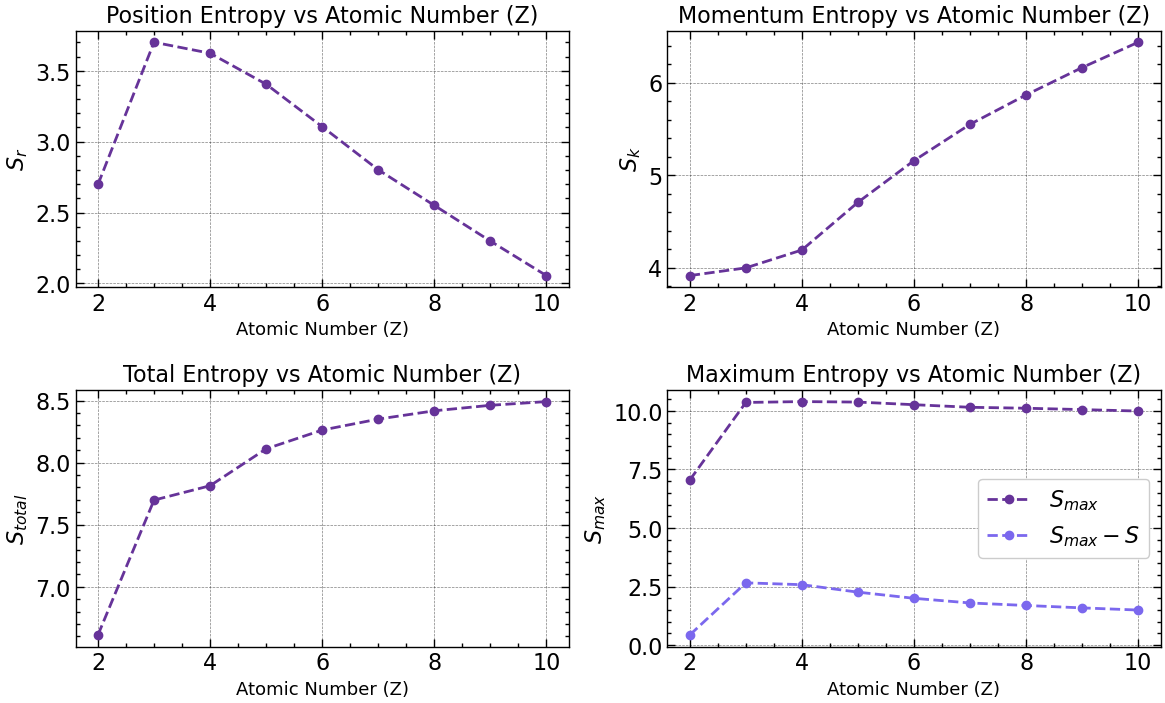

In [108]:
Z=np.arange(2,11)

plt.subplot(2,2,1)
plt.plot(Z,Sr_all,'o--',color='rebeccapurple')
plt.xlabel('Atomic Number (Z)',fontsize=13)
plt.ylabel(r'$S_r$')
plt.title('Position Entropy vs Atomic Number (Z)')

plt.subplot(2,2,2)
plt.plot(Z,Sk_all,'o--',color='rebeccapurple')
plt.xlabel('Atomic Number (Z)',fontsize=13)
plt.ylabel(r'$S_k$')
plt.title('Momentum Entropy vs Atomic Number (Z)')

plt.subplot(2,2,3)
plt.plot(Z,S_tot_all,'o--',color='rebeccapurple')
plt.xlabel('Atomic Number (Z)',fontsize=13)
plt.ylabel(r'$S_{total}$')
plt.title('Total Entropy vs Atomic Number (Z)')

plt.subplot(2,2,4)
plt.plot(Z,Smax_all,'o--',color='rebeccapurple',label=r'$S_{max}$')
plt.plot(Z,Smax_all-S_tot_all, 'o--',color='mediumslateblue',label=r'$S_{max}-S$')
plt.xlabel('Atomic Number (Z)',fontsize=13)
plt.ylabel(r'$S_{max}$')
plt.legend()
plt.title('Maximum Entropy vs Atomic Number (Z)')

plt.subplots_adjust(hspace=0.4)
plt.savefig('Entropies.png', dpi=300,bbox_inches='tight')
plt.show()

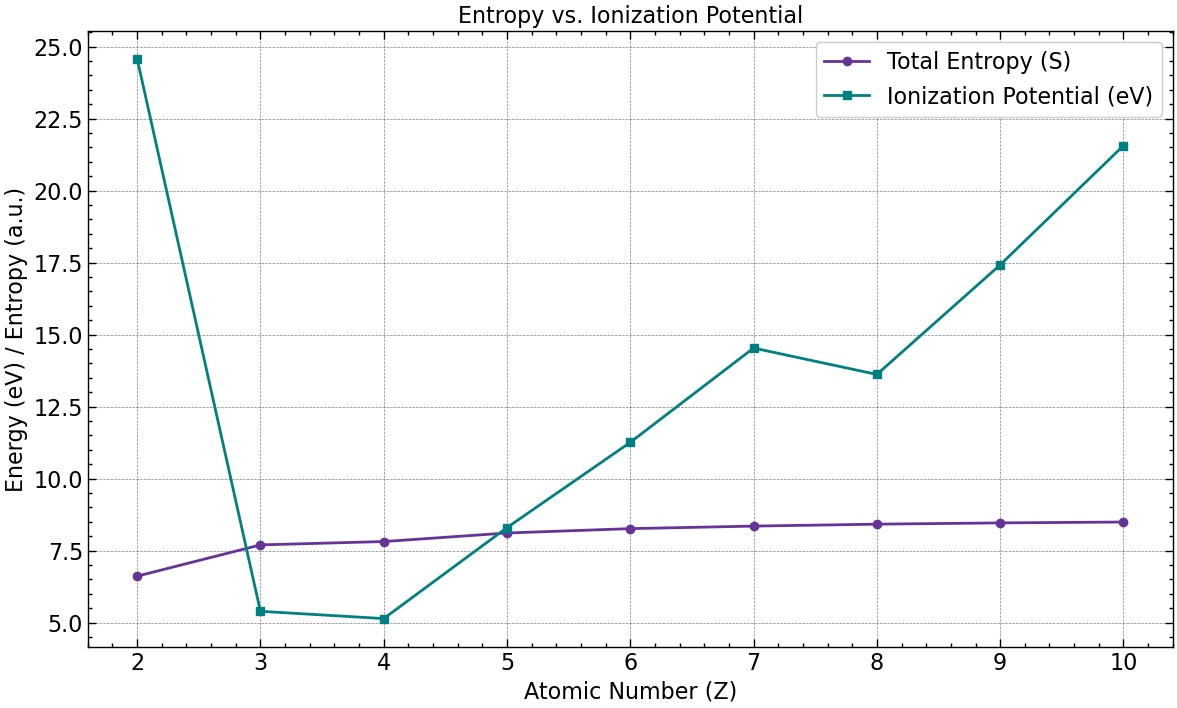

In [109]:
# Ionization Potential Data for atoms He to Ne
IP_exp = [24.587, 5.392, 5.139, 8.298, 11.260, 14.534, 13.618, 17.423, 21.565] 
plt.figure()
plt.plot(Z, S_tot_all, 'o-', color='rebeccapurple', label='Total Entropy (S)')
plt.plot(Z, IP_exp, 's-', color='teal', label='Ionization Potential (eV)')

plt.xlabel('Atomic Number (Z)')
plt.ylabel('Energy (eV) / Entropy (a.u.)')
plt.legend()
plt.title('Entropy vs. Ionization Potential')
plt.savefig('EntropyVSIonizationPot.png', dpi=300,bbox_inches='tight')
plt.show()

Exponential fit: Z = 0.00206 * e^(0.968*S) + 0.302

R² = 0.9952


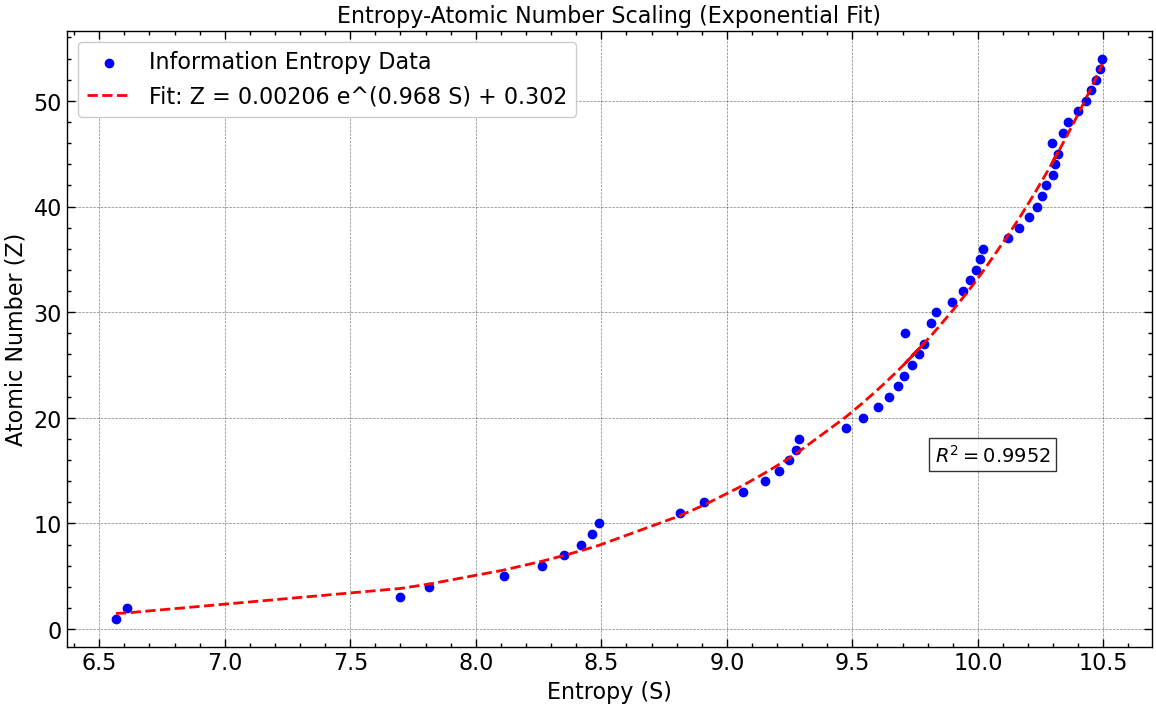

In [111]:
# Entropy values
entropy_data=np.loadtxt('Information_entropy.csv', delimiter=',')
Z=entropy_data[:,0]
S=entropy_data[:,1]

# Definition of the exponential function
def exponential_model(x,a,b,c):
    return a*np.exp(b*x)+c

# Fitting the model to the data
params, _ = curve_fit(exponential_model, S, Z, p0=[1, 0.1, 1])  # Initial guesses
a, b, c = params
print(f"Exponential fit: Z = {a:.5f} * e^({b:.3f}*S) + {c:.3f}\n")

# Generation of fitted curve
Z_fit = exponential_model(S, a, b, c)

# Calculate R^2
res = np.sum((Z-Z_fit)**2)          
tot = np.sum((Z-np.mean(Z))**2)    
R2 = 1-(res/tot)               
print(f"R² = {R2:.4f}")

# Plot
plt.scatter(S, Z, color='blue', label='Information Entropy Data')
plt.plot(S, Z_fit, '--', color='red', label=f'Fit: Z = {a:.5f} e^({b:.3f} S) + {c:.3f}')
plt.xlabel("Entropy (S)")
plt.ylabel("Atomic Number (Z)")
plt.text(x=0.8, y=0.3, s=f'$R^2 = {R2:.4f}$', transform=plt.gca().transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.8))
plt.title("Entropy-Atomic Number Scaling (Exponential Fit)")
plt.legend()
plt.savefig("exp_fit.png", dpi=300, bbox_inches='tight')
plt.show()